# Telco Data Churn - Analysis (EDA)
-- **Running this notebook is required in order to BOTH download the raw data and create a pruned + cleaned version of it for use on the NN.** --
## Specific Aim of analysis: Prune and Clean Data
Though possible to give a Neural Network a set of raw data and tell it to simply "predict customer churning," analysing the data to specifically look for things that have any kind of correlation with churning and then using those as the input can increase learning speed and accuracy.
Furthermore, understanding the data helps immensely with understanding the results derived by the NN and how the hidden layers of the NN may work.

### Personally, I also just need to learn how to perform EDA and expand my knowledge of technologies.
I believe in the workplace the NN's role is to automate churn prediction after data scientists and analysists have performed EDA to find out what the predictors actually are.

-- ***As detailed in README.md, this notebook allows for downloading of the dataset onto local devices, provided the user's personal 'kaggle.json' has been provided. If it has not, please refer to the readme.*** --


## Downloading the Dataset
The below cell is for downloading the dataset as detailed in the README.

### Troubleshooting - For if the below cell is not running properly
Please restart the notebook and try again. If problems persist, it could be for one of the following reasons:
1. 'kaggle.json' is in the wrong folder: If you do not have a file 'kaggle.json', refer to the file README.md in the root, otherwise make sure that 'kaggle.json' has been correctly placed in the folder '.kaggle' in the root.
2. The code has shifted out of order: Ensure that the line ``os.environ["KAGGLE_CONFIG_DIR"]`` is before KaggleApi is imported. This sets the working directory
3. The code is pointing to the wrong directory: Please use the commented out print statement labelled 'For Troubleshooting' to check where the api is pointing. If it does not match the .kaggle folder detailed here, you may either amend the workingdir so it points to the right place or follow the error and place 'kaggle.json' in the default scanning area


In [78]:
import os
workingdir = os.path.dirname(os.getcwd()) 
print("kaggle.json should be in: "+workingdir+"\\.kaggle")

os.environ["KAGGLE_CONFIG_DIR"] = os.path.join(workingdir,'.kaggle')

from kaggle.api.kaggle_api_extended import KaggleApi

# point the Kaggle CLI to the Kaggle folder, allowing for use of the dataset outside of the Kaggle Website
api = KaggleApi()

# For troubleshooting: print("The variable \"working dir\" should match: "+api.config_dir)
api.authenticate()

api.dataset_download_files(
    'blastchar/telco-customer-churn',
    path='../data/raw',
    unzip=True  # Extract into data/raw/
)
print("Downloaded and unzipped to data/raw/")


kaggle.json should be in: /home/uighodaro/Documents/GitHub/vanilla-NN-Numpy-w-EDA\.kaggle
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
Downloaded and unzipped to data/raw/


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Step 1: Data understanding
In order to prune the data for our purposes, we first need to understand what data is included in the CSV

### Important pre-cursors
1. **Churn Column**: If a customer has left the Telco within the last month, thye have "churned" and so their value for the churn attribute would be "yes" - Our aim is to find trends that can predict this.
2. **Service Columns**: Telco provides several services - Phones; Multiple Phone Lines; Internet; Online Security; Online Backups; Device Protection; Tech Support; TV Streaming; and Movie Streaming
3. **Customer Account Info Columns**: Customer Accounts Track - Tenure (length of subscription in years); Contract Type; Payment Method; If they have Paperless Billing; Monthly Charge; and Total Charge History
4. **Demographic Info Columns**: Technically account info - Gender; Age; If they have partners; If they have dependents



In [81]:
df.shape

(7043, 21)

Clearly not as large as a dataset like MNIST, but surely enough for some sort of learning to be done.

In [82]:
#It's generally better to see more columns than less, considering I have no clue what I'm looking for
#There are 21 columns, as found out above
pd.set_option('display.max_columns', 21)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Interestingly, TotalCharges is not in the above calculations despite being a numerical field as its current datatype is object.

Also interestingly, SeniorCitizen is a boolean field that was created using binary representation (dtype int64) and therefore included in this numeric calculation, so we can see the average number of senior citizens (0.16% of the population)and its standard deviation.
This may be used for other boolean fields if possible.

In [85]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


On further inspection, the 'Top' TotalCharges value is an empty box, where there are 11 occurrences. It is possible these are null values. We now check for null values using pandas.

In [86]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Nulls have been detected, though I suspect there may be textual numeric nulls in the TotalCharges column.

At first glance, the columns Gender, SeniorCitizen, Partner, Dependents, Tenure, Contract, MonthlyCharges and TotalCharges seem the most interesting toward our goal of finding churn predictors. 

Numerical columns that can be used for graphs are Tenure, MonthlyCharges and TotalCharges - however TotalCharges has dtype object which can't be used for numerical operations. This is the first thing that will be addressed in the next section.
## Step 2: Data Preparation
Springboarding off of the problem identified in the last section, I aim to make TotalCharges available for numeric operations with matplotlib and seaborn - but as a side benefit, avoid cases of texual numeric nulls in TotalCharges. 

This will be done as follows:
1. Search for and inspect non-numeric entries in the column
2. If non-numerics signify null entries, attempt a safe conversion of the dtype to numeric (coercing invalid strings to NaN), otherwise continue

In [87]:
#The pandas regular expression of the year seen below:
#Whole thing creates a column locating total charges that are not of type float64 and sets a "True" value if such is the case. If the value is normal then it reports "False"
non_numerics = ~df['TotalCharges'].astype(str).str.match(r'^\s*\d+(\.\d+)?\s*$')

#Breaking it down again for my own understanding and satisfaction:
# r'[placeholder text]' initiates a regex, similar to what is used in javaCC - Formal Languages is such a fun class guys please take it
# \s* allows for whitespace at the front
# \d+ means 1 or more denary numbers must follow
# (\.\d+)? means that optionally, a decimal point can follow before a bunch more denary numbers
# $ Signifies the end of the expression


df[non_numerics]['TotalCharges'].value_counts()            #If there are any non numerical entries, search for them for inspection

TotalCharges
    11
Name: count, dtype: int64

In [88]:
# We now inspect the rows with non numerical TotalCharges:
df[non_numerics]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We see that in all of these rows, the TotalCharges column is just empty. Interesting patterns are None of them are senior citizens; All of them are dependents with a 0 year tenure; All but 1 are on a 2 year contract and None of them are recorded as having Churned.

It then makes sense that they have no recorded total charges as they haven't had a tenure with the company at all - Perhaps they signed up but haven't started or never started?

In [89]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
# Then finally, repeating the earlier operation to check again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The nulls are now detected successfully, perfect.

We Check for the possibility that these are entirely errors and others have 0 total charges or a 0 year tenure 

In [91]:
df[df['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [92]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

The only customers with 0 tenure are the only customers with no total charge data. It also holds that a customer can not leave a company they never joined in the first place... hence, these rows will be deemed erroneous and deleting these values should not affect future observations.

In [93]:
# df.drop: labels specifies indexes or columns to drop, a tuple can be used to delete multiple
# axis: 0 = drop rows, 1 = drop columns
# inplace: If False, return a copy of the dataframe, else just change the dataframe... specifically for rows it seems?
df.drop(labels = df[df['tenure'] == 0].index, axis = 0, inplace = True)

In [94]:
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [95]:
# So now they are all gone
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [96]:
#Check if there are duplicates
df.loc[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [97]:
#Check specifically customerIDs, since duplicates of other values are more or less expected
df.duplicated(subset=['customerID']).sum()

np.int64(0)

In [98]:
# Finally, drop columns that are broadly unneeded or certainly irrelevant to our goal
# In this case, it is CustomerID
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 3: Feature Understanding/Univariate Analysis
In this section we attempt to understand features of the dataset. More importantly we aim to isolate the trends/significancies that exist in each customer attribute, allowing us to better understand why some features may contribute more to Churn than others.\
An illustrative example being the following hypothetical:\
1. Most customers that churned were not senior citizens\
2. The ratio of non-senior citizens to senior citizens is 9:1\
The statement of 2 may imply that 1 is only a correlation between traits, rather than a case of causation.

Of the 20 remaining columns, 3 are numerical and the others are categorical

Churn
No     5163
Yes    1869
Name: count, dtype: int64


<Axes: title={'center': 'Customer churn count'}, ylabel='count'>

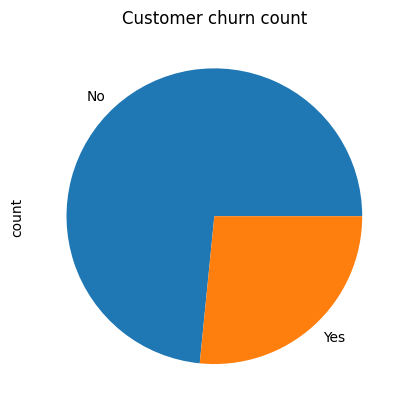

In [100]:
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='pie',title='Customer churn count')

1869/7032 ~ 26.6% of valid customers churned

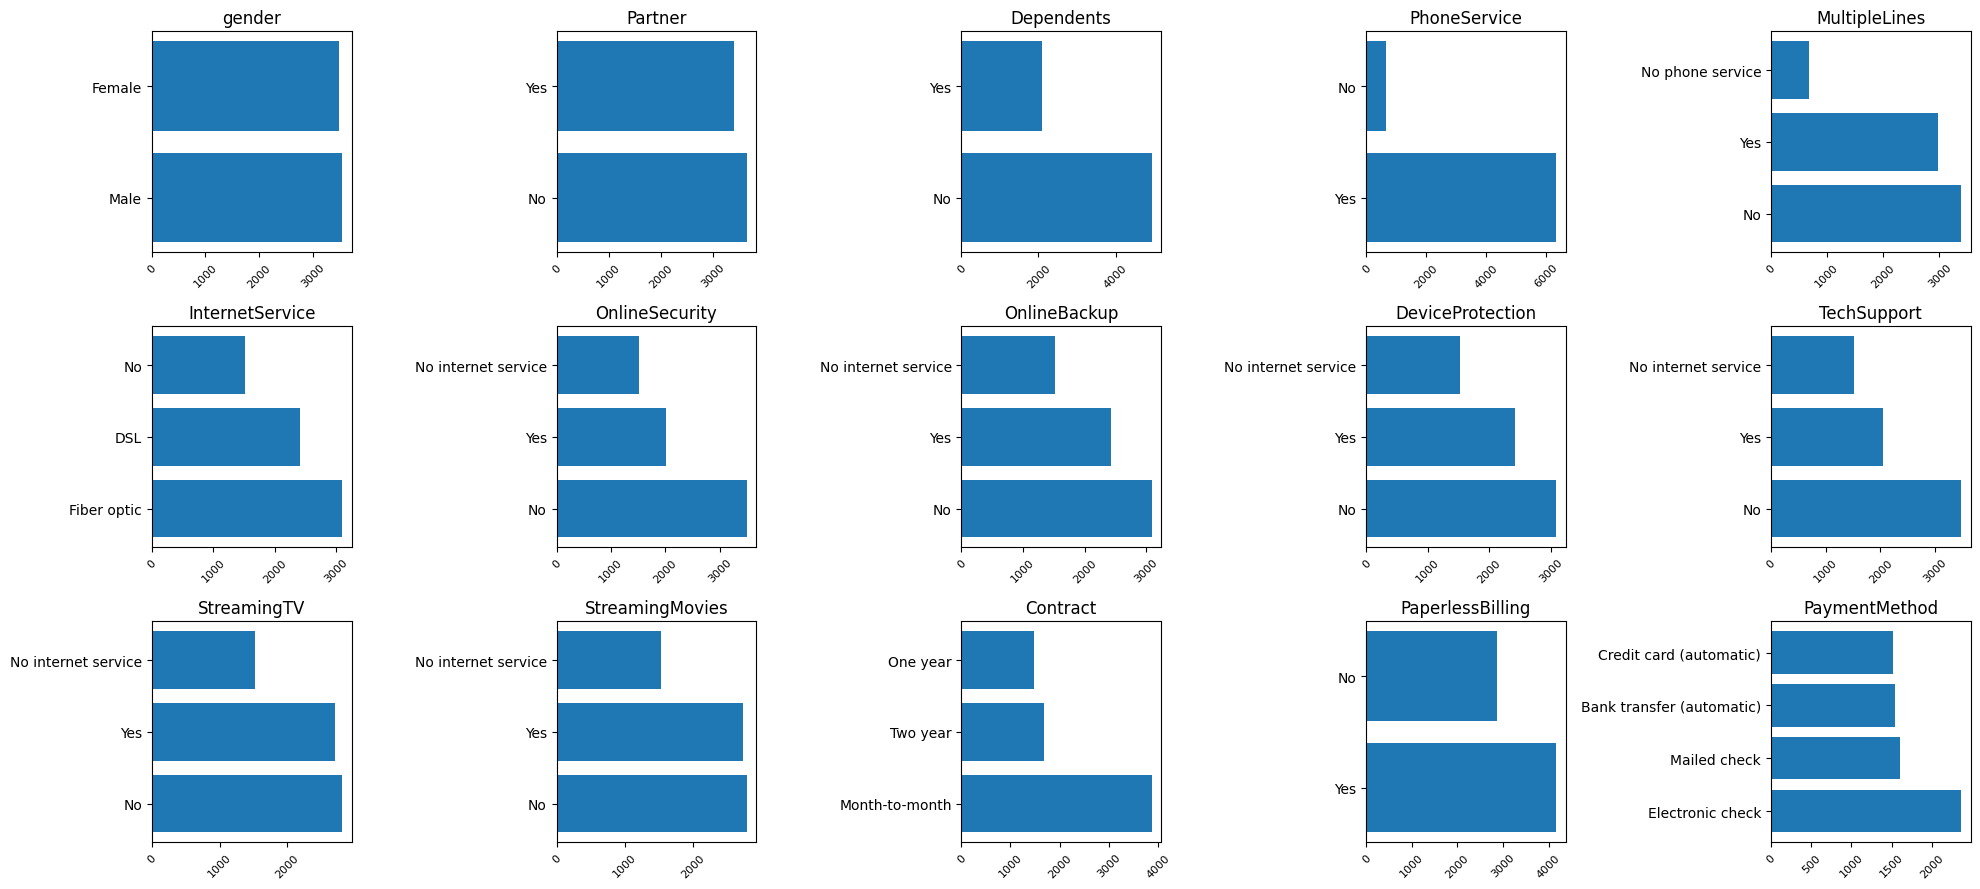

In [101]:
cat_cols = df.select_dtypes(include=[object]).columns.tolist()
cat_cols.remove('Churn')
rowN = 3
colN = int(np.ceil(len(cat_cols))/rowN)
fig, axes = plt.subplots(rowN, colN, figsize=(4*colN, 3*rowN), squeeze = False)

for i, c in enumerate(cat_cols):
    row = i // colN
    col = i % colN
    axes[row][col].barh(df[c].value_counts().index.astype(str), df[c].value_counts().values)
    axes[row][col].set_title(f'{c}')
    axes[row][col].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

Senior Citizen is not shown here due to currently being a numeric column. We therefore create a different plot for it.

In [102]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({ 0 : 'No', 1 : 'Yes'})

<Axes: title={'center': 'SeniorCitizen'}, ylabel='SeniorCitizen'>

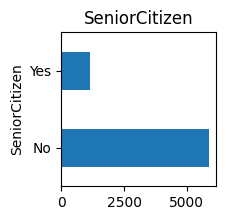

In [113]:
df['SeniorCitizen'].value_counts().plot(kind = 'barh', title = 'SeniorCitizen', figsize=(2,2))

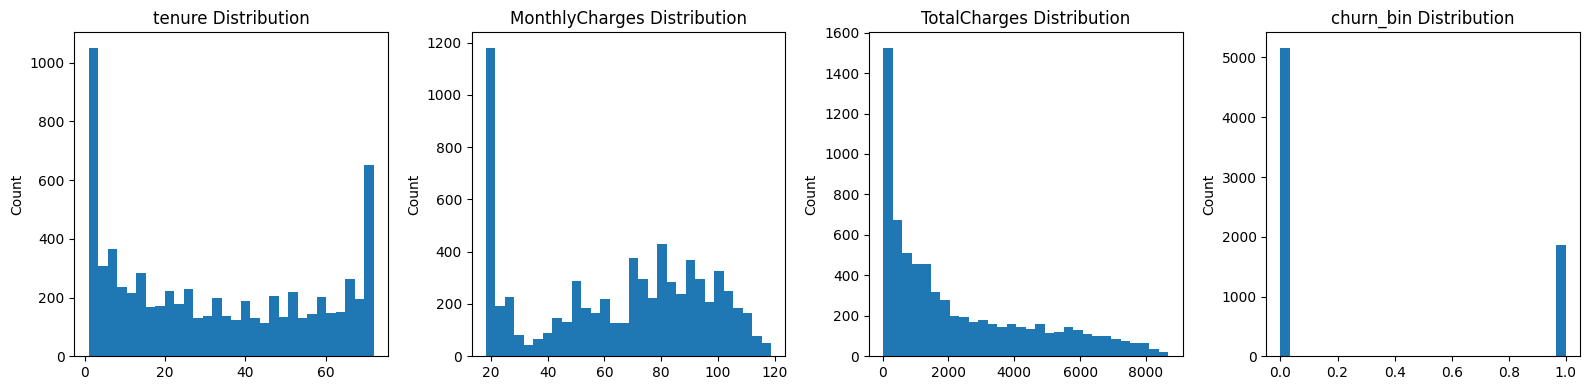

In [104]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(1, len(num_cols), figsize=(4*len(num_cols), 4), sharey=False)

for i, c in enumerate(num_cols):
    axes[i].hist(df[c], bins=30)
    axes[i].set_title(c + ' Distribution')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Step 4: Feature Relationships
The final step of analysis is to find out what items have the highest correlation/influence on if a customer will churn 

In [ ]:

df['churn_bin'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

#df['Partner_bin'] = df['Partner'].map({'Yes' : 1, 'No' : 0})
#df['Dependents_bin'] = df['Dependents'].map({'Yes' : 1, 'No' : 0})
#df['Security_bin'] = df['OnlineSecurity'].map({'Yes' : 1, 'No' : 0})
#df['Backup_bin'] = df['OnlineBackup'].map({'Yes' : 1, 'No' : 0})
#df['Protection_bin'] = df['DeviceProtection'].map({'Yes' : 1, 'No' : 0})
#df['Support_bin'] = df['TechSupport'].map({'Yes' : 1, 'No' : 0})
#df['TV_bin'] = df['StreamingTV'].map({'Yes' : 1, 'No' : 0})
#df['Movies_bin'] = df['StreamingMovies'].map({'Yes' : 1, 'No' : 0})

/tmp/ipykernel_9620/2860926076.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(box_data, labels=churn_rate.index.astype(str), showfliers=False)


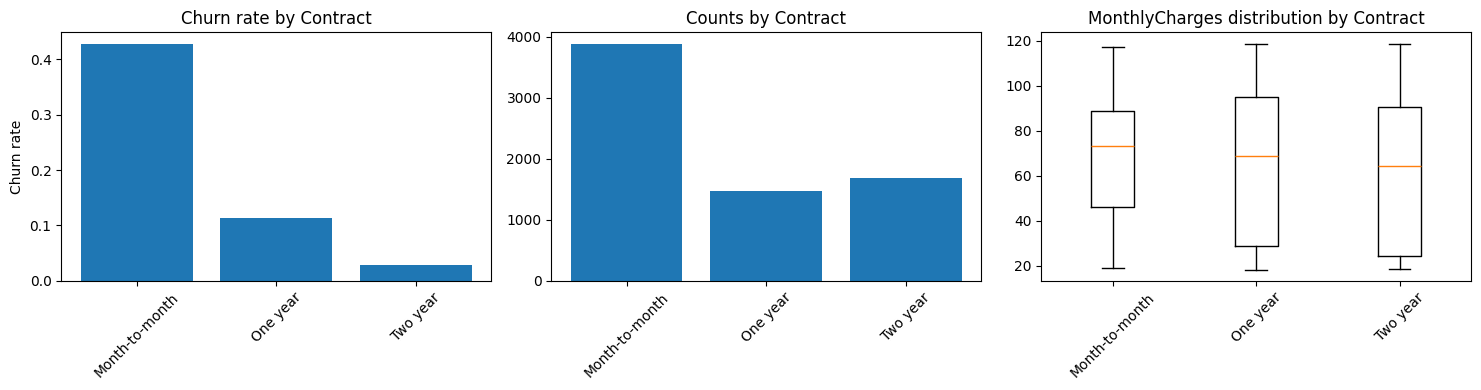

In [105]:
cat_col = 'Contract'    # categorical column
num_col = 'MonthlyCharges'   # numeric column
target_col = 'churn_bin'     # binary 0/1 churn column

# prepare simple aggregations
churn_rate = df.groupby('Contract')[target_col].mean().sort_values(ascending=False)
counts = df[cat_col].value_counts().reindex(churn_rate.index)  # same order
box_data = [df.loc[df[cat_col] == cat, num_col].dropna() for cat in churn_rate.index]

# create subplots: 1 row, 3 cols
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

# 1) bar - churn rate per category
axes[0].bar(churn_rate.index.astype(str), churn_rate.values)
axes[0].set_title('Churn rate by ' + cat_col)
axes[0].set_ylabel('Churn rate')
axes[0].tick_params(axis='x', rotation=45)

# 2) bar - counts (same category order)
axes[1].bar(churn_rate.index.astype(str), counts.values)
axes[1].set_title('Counts by ' + cat_col)
axes[1].tick_params(axis='x', rotation=45)

# 3) boxplots of numeric by category
axes[2].boxplot(box_data, labels=churn_rate.index.astype(str), showfliers=False)
axes[2].set_title(f'{num_col} distribution by {cat_col}')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()


In [106]:
# Reminder of the columns to be operated on
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'churn_bin'],
      dtype='object')

**Categorical relationships**\
We first check churn rate amongst the categorical columns - being columns with more than 2 possible states. E.g. Contract (type), 

In [107]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'churn_bin'],
      dtype='object')

<Axes: xlabel='Churn'>

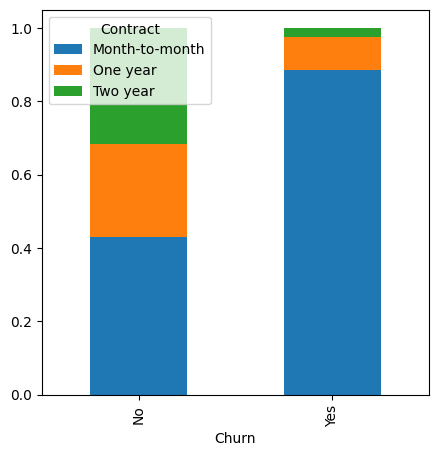

In [108]:
check = pd.crosstab(df['Churn'],df['Contract'], normalize='index')
check.plot(kind='bar', stacked='True',figsize=(5,5))

In [109]:
df.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_bin
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


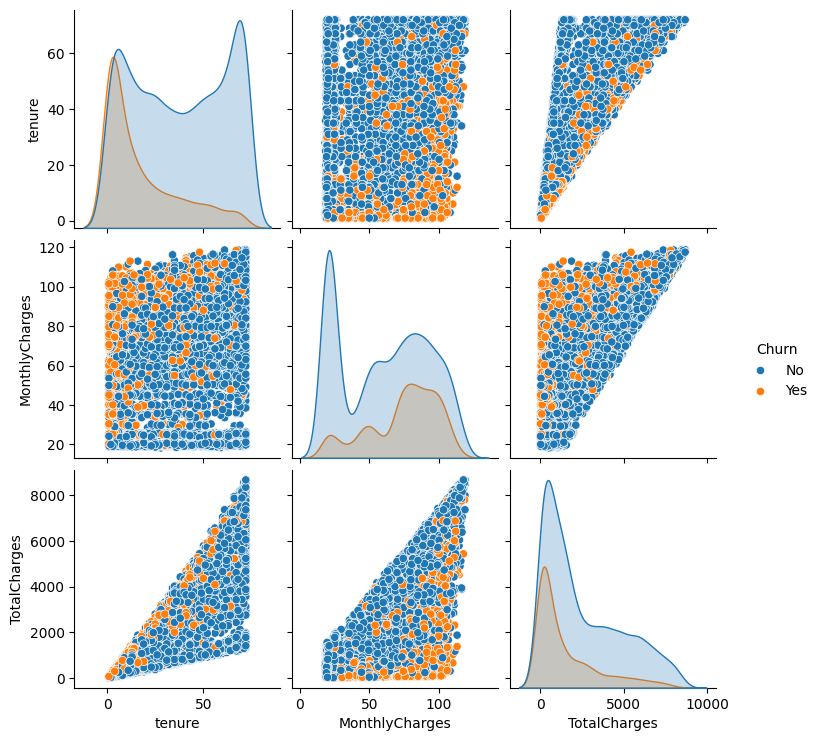

In [110]:
# We now check the relationships between the numerical columns
sns.pairplot(kind = 'scatter',
             x_vars=['tenure','MonthlyCharges','TotalCharges'],
             y_vars=['tenure','MonthlyCharges','TotalCharges'],
             hue = 'Churn',
             data = df)

In [111]:
df.describe(include = 'object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163
